# EDA of Supply Data
This notebook contains the exploratory data analysis of supply data that is used to train and test the solar and wind forecast models.  

- The first dataset contains time-series electrical <a href='#supply'>production</a> data records in MW for gas, hydro, renewables and imports for the entire state of California.

- The second dataset focuses on <a href='#renewables'>renewables</a> and breaks down contributions from each.

- The third dataset is a <a href='#power_plants'>power plants</a> database maintained by the California Energy Commission.

### Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Supply data
- 5 minute sampling interval for gas, hydro, renewables, and import production

In [24]:
sup = pd.read_csv('../datasets/time_series/supply_series.csv')
sup['date'] = pd.to_datetime(sup['date'])
sup.set_index('date', inplace=True)
sup.head(3)

,gas,hydro,renewables,imports,total
date,,,,,
2018-04-12 00:00:00,5853.0,3510.0,5853.0,5263.0,20479.0
2018-04-12 00:05:00,6011.0,3414.0,5824.0,5117.0,20366.0
2018-04-12 00:10:00,6286.0,3104.0,5860.0,5281.0,20531.0


### Hourly supply analysis

In [25]:
# average 5 minute data into hourly samples
hs = sup.resample('H').mean()
print(hs.shape)
hs.head(3)

(18492, 5)


,gas,hydro,renewables,imports,total
date,,,,,
2018-04-12 00:00:00,5928.75,3046.000000,5940.333333,5525.083333,20440.166667
2018-04-12 01:00:00,5429.75,2690.333333,5762.000000,5913.666667,19795.750000
2018-04-12 02:00:00,5029.25,2702.250000,5772.750000,5854.500000,19358.750000


<a id='supply'></a>

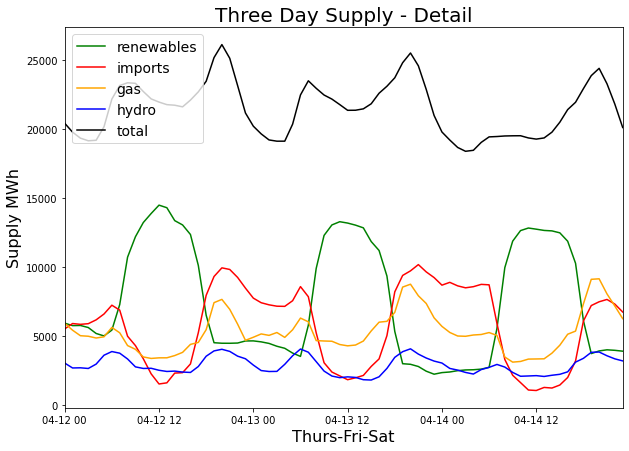

In [73]:
plt.figure(figsize=(10,7))
plt.plot(hs['renewables'][0:72],'g-',label='renewables')
plt.plot(hs['imports'][0:72],'r-',label='imports')
plt.plot(hs['gas'][0:72],'orange',label='gas')
plt.plot(hs['hydro'][0:72],'b-',label='hydro')
plt.plot(hs['total'][0:72],'k-',label='total')
plt.xlabel('Thurs-Fri-Sat',fontsize=16)
plt.ylabel('Supply MWh',fontsize=16)
plt.title('Three Day Supply - Detail',fontsize=20)
plt.legend(fontsize=14,loc='upper left');
plt.xlim((hs.index[0],hs.index[71]))
plt.savefig('../images/three_day_supply.png',dpi=235,bbox_inches='tight');

<a id='supply'></a>

**Three Day Supply - Detail**
- There are large fluctuations in renewables, primarily in the day time due to solar inputs
- Hydro, gas, and imports are flexed in the mornings and evenings to balance contributions from renewables
- Saturday morning production is lower because demand is lower then
- See figure below to compare renewables versus nonrenewables grouped

(736796.0, 736798.9583333334)

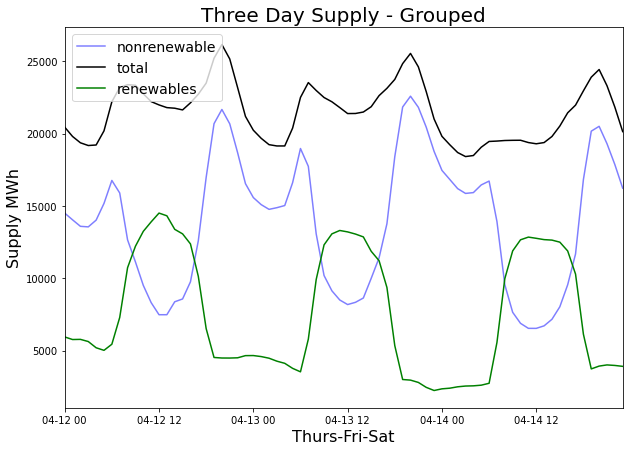

In [72]:
plt.figure(figsize=(10,7))
plt.plot(hs['gas'][0:72]+hs['imports'][0:72]+hs['hydro'][0:72],'b-',label='nonrenewable',alpha=0.5)
plt.plot(hs['total'][0:72],'k-',label='total')
plt.plot(hs['renewables'][0:72],'g-',label='renewables')
plt.xlabel('Thurs-Fri-Sat',fontsize=16)
plt.ylabel('Supply MWh',fontsize=16)
plt.title('Three Day Supply - Grouped',fontsize=20)
plt.legend(fontsize=14,loc='upper left');
plt.xlim((hs.index[0],hs.index[71]))
#plt.savefig('../images/renewables_net_demand.png',dpi=235,bbox_inches='tight');

**Three Day Supply - Grouped**
- Renewables peak during the day but still only make up about half of the total electrical production
- Most nonrenewable production is the the evening, overnight, and in the morning

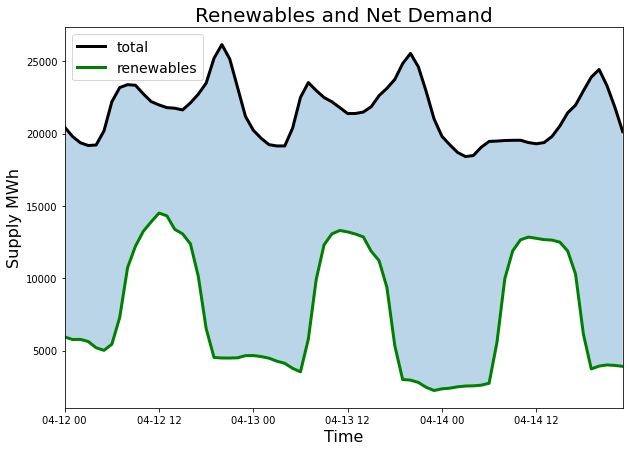

In [70]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(hs.index[0:72],hs['total'][0:72],'k-',label='total',lw=3)
ax.plot(hs.index[0:72],hs['renewables'][0:72],'g-',label='renewables',lw=3)
ax.fill_between(hs.index[0:72],hs['total'][0:72],hs['renewables'][0:72],alpha=0.3)
ax.legend(fontsize=14)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Supply MWh',fontsize=16)
plt.title('Renewables and Net Demand',fontsize=20)
plt.xlim((hs.index[0],hs.index[71]))
#plt.savefig('../images/renewables_net_demand.png',dpi=235,bbox_inches='tight');

### Weekly Supply

In [28]:
wks = hs.resample('7D').mean()
wks.head(3)

,gas,hydro,renewables,imports,total
date,,,,,
2018-04-12,4923.830357,2981.047619,7231.466270,5722.005952,20858.350198
2018-04-19,4981.267857,2590.102183,7982.541667,5473.579365,21027.491071
2018-04-26,4003.836806,2716.353472,8950.815972,5667.672917,21338.679167


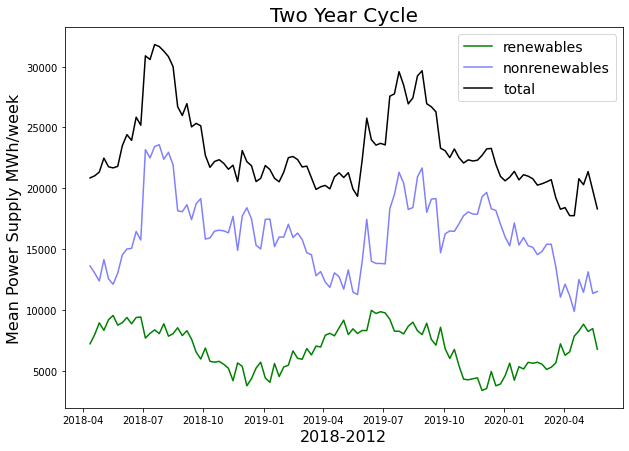

In [29]:
plt.figure(figsize=(10,7))
plt.plot(wks['renewables'],'g-',label='renewables')
plt.plot(wks['hydro']+wks['gas']+wks['imports'],'b-',label='nonrenewables',alpha=0.5)
plt.plot(wks['total'],'k-',label='total')
plt.legend(fontsize=14)
plt.title('Two Year Cycle',fontsize=20)
plt.xlabel('2018-2012',fontsize=16)
plt.ylabel('Mean Power Supply MWh/week',fontsize=16);

**Two year Cycle**
- Time series resampled to average weekly frequency shows the annual trends in supply
- Note the seasonal highs in renewables nearly correlate to seasonal total production, which is driven by demand (higher in the summer, lower in the winter

## Time Series Renewables
- 5 minute sampling interval for solar, wind, geothermal, biomass, and biogas production

In [30]:
# read in 5 minute time series data and set datetime index
ren = pd.read_csv('../datasets/time_series/renewables_series.csv')
ren['date'] = pd.to_datetime(ren['date'])
ren.set_index('date', inplace=True)
ren.head(3)

,solar,wind,geothermal,biomass,biogas
date,,,,,
2018-04-12 00:00:00,0.0,4228.0,706.0,242.0,242.0
2018-04-12 00:05:00,0.0,4196.0,716.0,238.0,242.0
2018-04-12 00:10:00,0.0,4214.0,725.0,240.0,241.0


### Hourly sampling

In [31]:
mwh = ren.resample('H').mean()
print(mwh.shape)
mwh.head(3)

(18504, 5)


,solar,wind,geothermal,biomass,biogas
date,,,,,
2018-04-12 00:00:00,0.0,4334.916667,688.250000,243.166667,241.333333
2018-04-12 01:00:00,0.0,4197.000000,654.750000,236.916667,241.083333
2018-04-12 02:00:00,0.0,4250.583333,643.916667,238.333333,242.500000


<a id='renewables'></a>

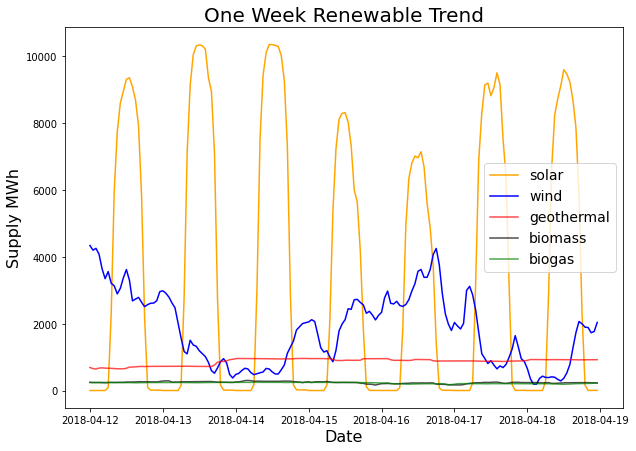

In [32]:
plt.figure(figsize=(10,7))
plt.plot(mwh['solar'][0:24*7],'orange',label='solar')
plt.plot(mwh['wind'][0:24*7],'b-',label='wind')
plt.plot(mwh['geothermal'][0:24*7],'r-',label='geothermal',alpha=0.7)
plt.plot(mwh['biomass'][0:24*7],'k-',label='biomass',alpha=0.7)
plt.plot(mwh['biogas'][0:24*7],'g-',label='biogas',alpha=0.7)
plt.legend(fontsize=14)
plt.title('One Week Renewable Trend',fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Supply MWh',fontsize=16);
#plt.savefig('../images/renewables_week.png',dpi=235,bbox_inches='tight');

**One Week Renewable Trend**
- Maximum peak production comes from solar, but only during the day
- Wind is periodic but far less regularly predictable than solar
- Geothermal, biomass, and biogas are smalltime contributers but are constant
- Depending on conditions, solar production can range from about 60%-100% efficient
- Depending on conditions wind can range from about 10%-100% efficient

### Weekly sampling

In [33]:
rwks = mwh.resample('7D').mean()
rwks.head(3)

,solar,wind,geothermal,biomass,biogas
date,,,,,
2018-04-12,3584.472312,1829.734443,863.838474,239.467713,223.612734
2018-04-19,3940.009064,2152.392091,921.091360,250.547033,233.807991
2018-04-26,3679.982828,3315.297348,920.409091,294.692045,239.192045


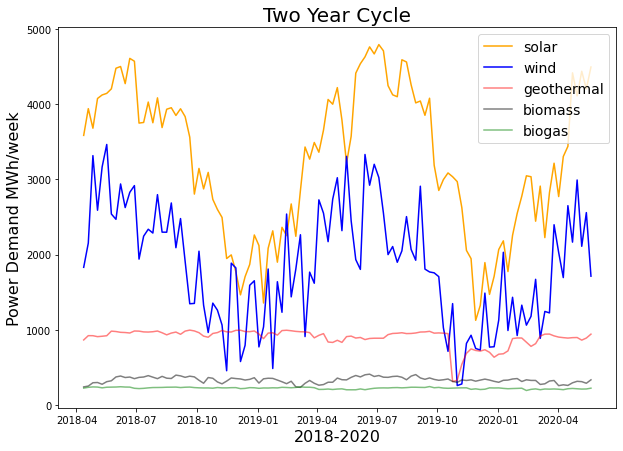

In [34]:
plt.figure(figsize=(10,7))
plt.plot(rwks['solar'],'orange',label='solar')
plt.plot(rwks['wind'],'b-',label='wind')
plt.plot(rwks['geothermal'],'r-',label='geothermal',alpha=0.5)
plt.plot(rwks['biomass'],'k-',label='biomass',alpha=0.5)
plt.plot(rwks['biogas'],'g-',label='biogas',alpha=0.5)
plt.title('Two Year Cycle',fontsize=20)
plt.legend(fontsize=14)
plt.xlabel('2018-2020',fontsize=16)
plt.ylabel('Power Demand MWh/week',fontsize=16);

**Two Year Cycle**
- Both wind and solar show significant seasonal variation with highs in the summer months and lows in the winter months
- Other renewables show constant behaviour over the course of the year

<a id="power_plants"><a>
    
## Power plants
- Panel data with attributes of power plants that supply California with electricity.
- The net demand forecast model depends on the plant locations and capacities

In [35]:
cgec = pd.read_csv('../datasets/California_Power_Plants.csv')
print(cgec.shape)
cgec.info()

(2506, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OBJECTID_12_13                2506 non-null   int64  
 1   Plant_ID                      2506 non-null   object 
 2   Plant_Alias                   1516 non-null   object 
 3   Plant_Label                   2506 non-null   object 
 4   MW                            2491 non-null   float64
 5   Gross_MWh                     1565 non-null   float64
 6   Net_MWh                       1548 non-null   float64
 7   General_Fuel                  2504 non-null   object 
 8   Status                        2495 non-null   object 
 9   STEP_License_Status           197 non-null    object 
 10  Gen_Count                     1808 non-null   float64
 11  Initial_Start_Date            1809 non-null   float64
 12  Online_Year                   1810 non-null   float

### Filter to look at only operating solar facilities by county
- 96% of the solar production feeding the state of California comes from just seventeen counties.

In [39]:
solar = cgec[(cgec['General_Fuel']=='Solar') & (cgec['Status']=='Operating')]
print(solar.shape)
county_solar = solar.groupby(by='County')['MW'].sum().sort_values(ascending=False)[:20]
county_solar

(849, 56)


County
Kern               2422.980000
Imperial           1614.207195
Los Angeles        1235.218000
Riverside           952.253973
Fresno              898.460000
San Luis Obispo     810.040000
Clark               751.100000
San Bernardino      669.660000
Maricopa            611.000000
Kings               482.490000
Tulare              317.710000
Monterey            291.370000
San Benito          246.000000
Yuma                243.000000
Sacramento          155.110000
Merced              139.000000
San Diego           112.220000
Stanislaus           48.170000
Santa Barbara        45.330000
Contra Costa         42.510000
Name: MW, dtype: float64

In [15]:
# Define new dataframe with the top 17 producing counties
main_solar = solar[(solar['County']==county_solar.index[0]) |
                   (solar['County']==county_solar.index[1]) |
                   (solar['County']==county_solar.index[2]) |
                   (solar['County']==county_solar.index[3]) |
                   (solar['County']==county_solar.index[4]) |
                   (solar['County']==county_solar.index[5]) |
                   (solar['County']==county_solar.index[6]) |
                   (solar['County']==county_solar.index[7]) |
                   (solar['County']==county_solar.index[8]) |
                   (solar['County']==county_solar.index[9]) |
                   (solar['County']==county_solar.index[10]) |
                   (solar['County']==county_solar.index[11]) |
                   (solar['County']==county_solar.index[12]) |
                   (solar['County']==county_solar.index[13]) |
                   (solar['County']==county_solar.index[14]) |
                   (solar['County']==county_solar.index[15]) |
                   (solar['County']==county_solar.index[16])
                  ]

### Spatial distribution of solar plants
- Can use clustering to group plants with similar weather

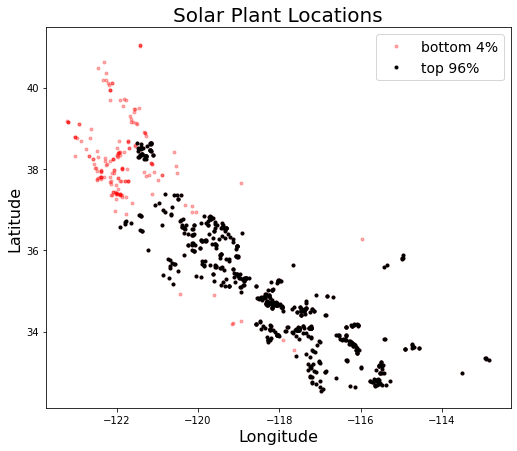

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(solar['Longitude'],solar['Latitude'],'r.',alpha=0.3,label='bottom 4%')
ax.plot(main_solar['Longitude'],main_solar['Latitude'],'k.',label='top 96%')
ax.set_aspect('equal')
plt.legend(fontsize=14)
plt.title('Solar Plant Locations',fontsize=20)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16);

#### Export main solar to csv

In [17]:
# main_solar.to_csv('../datasets/main_solar.csv',index=False)

### Filter to look at only operating wind plants by county

In [74]:
wind = cgec[(cgec['General_Fuel']=='Wind') & (cgec['Status']=='Operating')]
county_wind = wind.groupby('County')['MW'].sum().sort_values(ascending=False)
print(wind.shape)
county_wind

(157, 56)


County
Kern              3526.140
Solano            1044.330
Riverside          687.850
Alameda            497.130
Torrance           298.200
Imperial           265.440
Beaver             203.500
San Diego          182.000
Contra Costa       116.200
Shasta             101.200
Millard            100.500
Merced              18.650
San Bernardino       9.015
Monterey             3.850
San Joaquin          3.500
Los Angeles          1.894
Tehama               1.000
Yolo                 1.000
Name: MW, dtype: float64

In [19]:
# define a new dataframe with the top 11 producing counties
main_wind  = wind[(wind['County']==county_wind.index[0]) |
                  (wind['County']==county_wind.index[1]) |
                  (wind['County']==county_wind.index[2]) |
                  (wind['County']==county_wind.index[3]) |
                  (wind['County']==county_wind.index[4]) |
                  (wind['County']==county_wind.index[5]) |
                  (wind['County']==county_wind.index[6]) |
                  (wind['County']==county_wind.index[7]) |
                  (wind['County']==county_wind.index[8]) |
                  (wind['County']==county_wind.index[9]) |
                  (wind['County']==county_wind.index[10])
             ]

In [20]:
print(f"{main_wind.shape[0]} plants produce {round(main_wind['MW'].sum()/wind['MW'].sum()*100)}% of CA wind power")

137 plants produce 79.0% of CA wind power


### Spatial distribution of wind plants

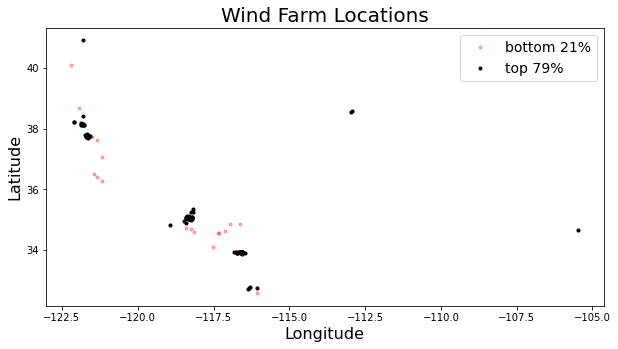

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(wind['Longitude'],wind['Latitude'],'r.',alpha=0.3,label='bottom 21%')
ax.plot(main_wind['Longitude'],main_wind['Latitude'],'k.',label='top 79%')
ax.set_aspect('equal')
plt.legend(fontsize=14)
plt.title('Wind Farm Locations',fontsize=20)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16);

#### Export main wind to csv

In [22]:
# main_wind.to_csv('../datasets/main_wind.csv',index=False)